In [1]:
import pandas as pd
df = pd.read_csv ('application_train.csv')
target_value_counts = df['TARGET'].value_counts()
print (target_value_counts)
# checking whether 'TARGET' is imbalance data set or not

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [2]:
df.shape

(307511, 122)

In [3]:
# Assuming you have a DataFrame named df with lots columns
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the result
print(missing_values)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [4]:
# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values
print(columns_with_missing_values)

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [5]:
print(missing_values.head(20))

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64


In [ ]:
# Display the first 20 columns with missing values and their counts
print(df.isnull().sum().head(20))

In [ ]:
# Display the first 20 columns with missing values and their counts
print(df.isnull().sum().head(120))

In [ ]:
# Display the first 20 columns with missing values and their counts
print(df.isnull().sum().head(40))

In [6]:
# showing type of columns
# Get the count of each data type
dtype_counts = df.dtypes.value_counts()
# Display the result
print(dtype_counts)

float64    65
int64      41
object     16
Name: count, dtype: int64


In [7]:
# Select columns with 'object' dtype and get the number of unique values in each column
unique_counts = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
# Display the result
print(unique_counts)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [8]:
# Get the value counts for the 'ORGANIZATION_TYPE' column
organization_type_counts = df['ORGANIZATION_TYPE'].value_counts()
# Display the result
print(organization_type_counts)

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [9]:
from sklearn.preprocessing import LabelEncoder

# Load the CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Initialize LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate over columns in the training set
for col in application_train.columns:
    if application_train[col].dtype == 'object':
        if len(application_train[col].unique()) <= 2:
            le.fit(application_train[col])
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
print('%d columns were label encoded.' % le_count)

In [10]:
# Load the CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Identify categorical columns
categorical_columns_train = application_train.select_dtypes('object').columns
categorical_columns_test = application_test.select_dtypes('object').columns

# Apply one-hot encoding to the training set
application_train = pd.get_dummies(application_train, columns=categorical_columns_train)

# Apply one-hot encoding to the test set
application_test = pd.get_dummies(application_test, columns=categorical_columns_test)

# Display the first few rows of the updated datasets
print(application_train.head())
print(application_test.head())

   SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  ...  HOUSETYPE_MODE_terraced house  \
0           -637  ...                          False   
1          -1188  ... 

In [ ]:
df.shape

In [11]:
application_train.shape

(307511, 246)

In [12]:
application_test.shape

(48744, 242)

In [13]:
# Read the training and test CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Extract the 'TARGET' column from the training set
train_labels = application_train['TARGET']

# Align columns of the training and test sets, keeping only the common columns
application_train, application_test = application_train.align(application_test, join='inner', axis=1)

# Assign the 'TARGET' column back to the training set
application_train['TARGET'] = train_labels

# Display the first few rows of the aligned training set
print(application_train.head())

   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0

In [14]:
application_test.shape

(48744, 121)

In [15]:
application_train.shape

(307511, 122)

In [17]:
# Before one-hot encoding
print("Before one-hot encoding:", len(application_train.columns))

# Identify categorical columns
categorical_columns_train = application_train.select_dtypes('object').columns
categorical_columns_test = application_test.select_dtypes('object').columns

# Apply one-hot encoding to the training set
application_train = pd.get_dummies(application_train, columns=categorical_columns_train)

# Apply one-hot encoding to the test set
application_test = pd.get_dummies(application_test, columns=categorical_columns_test)

# Before alignment
print("Before alignment:", len(application_train.columns), len(application_test.columns))

# Ensure that both datasets have the same columns after one-hot encoding
common_columns = list(set(application_train.columns) & set(application_test.columns))
application_train = application_train[common_columns]
application_test = application_test[common_columns]

# After alignment
print("After alignment:", len(application_train.columns), len(application_test.columns))

Before one-hot encoding: 122
Before alignment: 246 242
After alignment: 242 242


In [18]:
application_train['TARGET'] = train_labels

In [20]:
application_train.shape

(307511, 243)

In [21]:
application_test.shape

(48744, 242)

In [22]:
years_birth = application_train['DAYS_BIRTH'] / -365
print(years_birth.describe())
# checking DAYS_BIRTH anomalies

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


In [23]:
years_employed = application_train['DAYS_EMPLOYED']
print(years_employed.describe())
# checking DAYS_EMPLOYED anomalies

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


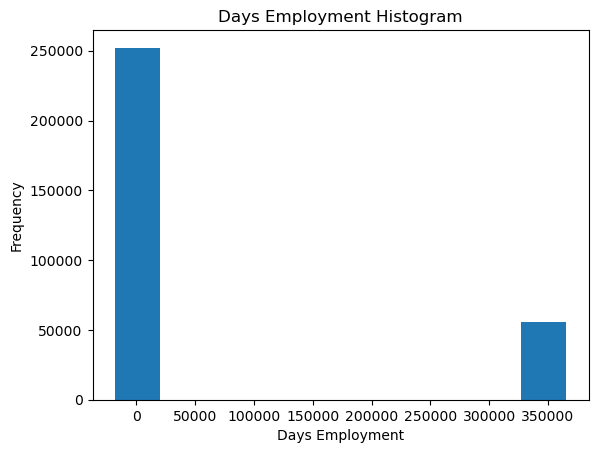

In [24]:
import matplotlib.pyplot as plt
# trying to do additional EDA
# Assuming 'application.train' is actually 'application_train'
application_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [25]:
# anomalies handling
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]

print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('There are %d anomalies in days of employment' % len(anom))

The anomalies default on 5.40% of loans
The non-anomalies default on 8.66% of loans
There are 55374 anomalies in days of employment


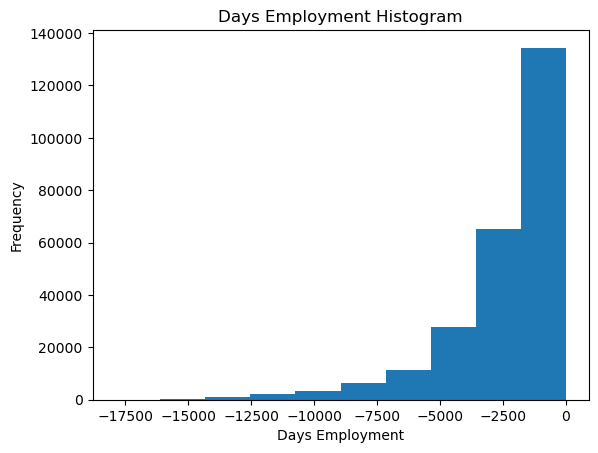

In [26]:
# visualize Anomalies Histogram
import numpy as np
import matplotlib.pyplot as plt

# Create a new column indicating anomalies in 'DAYS_EMPLOYED'
application_train['DAYS_EMPLOYED_ANOM'] = application_train['DAYS_EMPLOYED'] == 365243

# Replace 365243 with NaN in 'DAYS_EMPLOYED' column
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Plot the histogram
application_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [27]:
# Create a new column indicating anomalies in 'DAYS_EMPLOYED' for the test data
application_test['DAYS_EMPLOYED_ANOM'] = application_test['DAYS_EMPLOYED'] == 365243

# Replace 365243 with NaN in 'DAYS_EMPLOYED' column for the test data
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Print the number of anomalies in the test data
print('There are %d anomalies in the test data out of %d' % (application_test['DAYS_EMPLOYED_ANOM'].sum(), len(application_test)))

There are 9274 anomalies in the test data out of 48744


In [28]:
# Showing data correlations
correlations = application_train.corr()['TARGET'].sort_values()

print('Most positive correlations:\n', correlations.tail(15))
print('Most negative correlations:\n', correlations.head(15))

Most positive correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most negativ

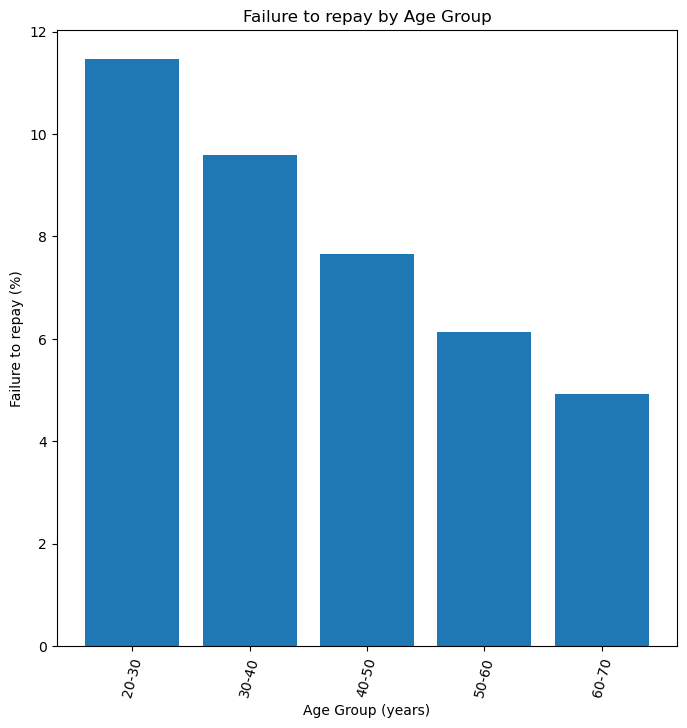

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'application_train' is your DataFrame and 'DAYS_BIRTH' is the age in days
application_train['Age_Groups'] = pd.cut(application_train['DAYS_BIRTH'] / -365, bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Calculate the percentage of failure to repay in each age group
age_groups = application_train.groupby('Age_Groups')['TARGET'].mean()

# Create a figure and set the size
plt.figure(figsize=(8, 8))

# Plot the bar chart
plt.bar(age_groups.index.astype(str), 100 * age_groups)

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Set labels and title
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to repay (%)')
plt.title('Failure to repay by Age Group')

# Show the plot
plt.show()

In [31]:
# Correlation between external source to TARGET
ext_data = application_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH']]
ext_data_corrs= ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.178919,-0.160472,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.186846,0.213982,-0.600610
EXT_SOURCE_3,-0.178919,0.186846,1.000000,0.109167,-0.205478
EXT_SOURCE_2,-0.160472,0.213982,0.109167,1.000000,-0.091996
DAYS_BIRTH,0.078239,-0.600610,-0.205478,-0.091996,1.000000


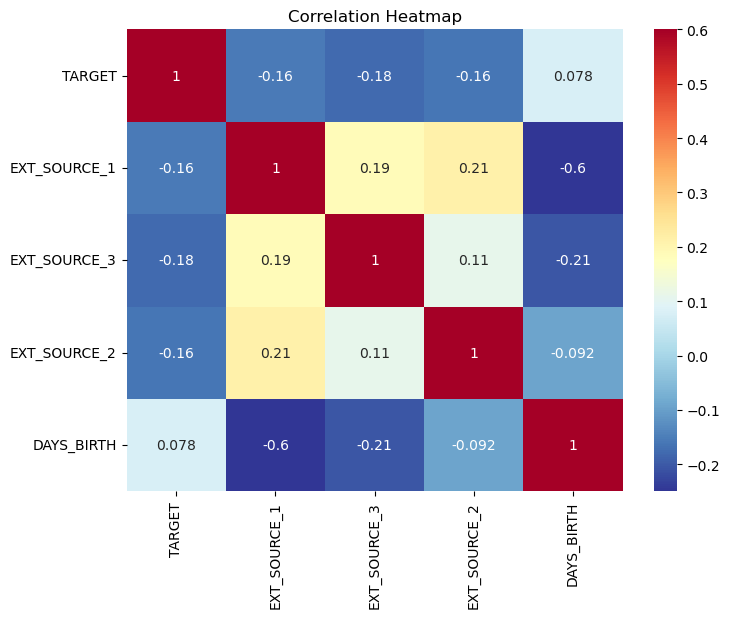

In [32]:
# Seeing heatmap for correlations between external source to TARGET
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Use sns.heatmap for better visualization
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)

plt.title('Correlation Heatmap')
plt.show()

In [33]:
application_train_domain = application_train.copy()
application_test_domain = application_test.copy()

application_train_domain['CREDIT_INCOME_PERCENT']=application_train_domain['AMT_CREDIT']/application_train_domain['AMT_INCOME_TOTAL']
application_train_domain['ANNUITY_INCOME_PERCENT']=application_train_domain['AMT_ANNUITY']/application_train_domain['AMT_INCOME_TOTAL']
application_train_domain['CREDIT_TERM']=application_train_domain['AMT_ANNUITY']/application_train_domain['AMT_CREDIT']
application_train_domain['DAYS_EMPLOYED_PERCENT']=application_train_domain['DAYS_EMPLOYED']/application_train_domain['DAYS_BIRTH']

In [34]:
application_test_domain['CREDIT_INCOME_PERCENT']=application_test_domain['AMT_CREDIT']/application_test_domain['AMT_INCOME_TOTAL']
application_test_domain['ANNUITY_INCOME_PERCENT']=application_test_domain['AMT_ANNUITY']/application_test_domain['AMT_INCOME_TOTAL']
application_test_domain['CREDIT_TERM']=application_test_domain['AMT_ANNUITY']/application_test_domain['AMT_CREDIT']
application_test_domain['DAYS_EMPLOYED_PERCENT']=application_test_domain['DAYS_EMPLOYED']/application_test_domain['DAYS_BIRTH']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


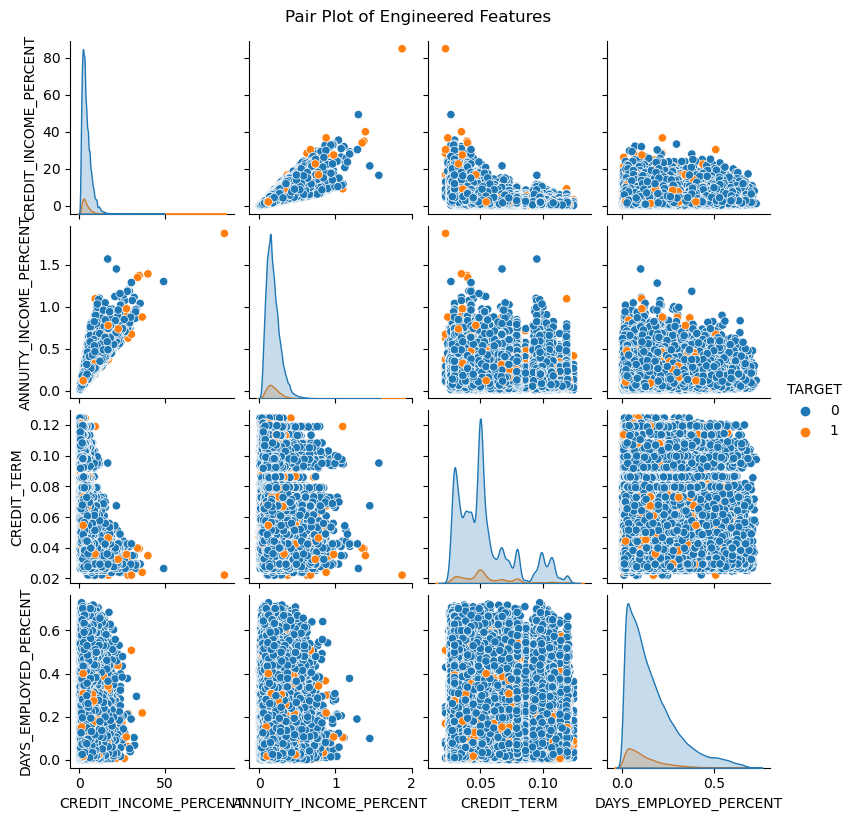

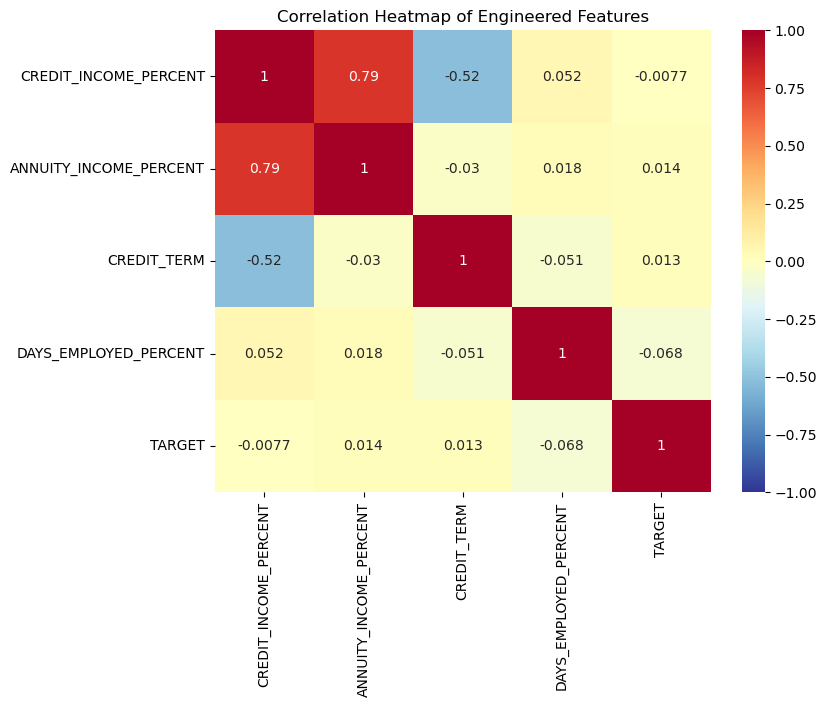

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming application_train_domain is your DataFrame with the engineered features
features_to_visualize = [
    'CREDIT_INCOME_PERCENT',
    'ANNUITY_INCOME_PERCENT',
    'CREDIT_TERM',
    'DAYS_EMPLOYED_PERCENT',
    'TARGET'  # Target variable
]

# Subset the DataFrame to include only the selected features
visualization_data = application_train_domain[features_to_visualize]

# Pair Plot
sns.pairplot(visualization_data, hue='TARGET', height=2)
plt.suptitle('Pair Plot of Engineered Features', y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = visualization_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap=plt.cm.RdYlBu_r, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Engineered Features')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [46]:
categorical_columns = application_train.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index([], dtype='object')


In [47]:
categorical_columns = application_test.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index([], dtype='object')


In [48]:
categorical_columns = application_train.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Age_Groups'], dtype='object')


In [49]:
unique_values = application_train['Age_Groups'].unique()
print("Unique values in 'Age_Groups':", unique_values)

Unique values in 'Age_Groups': ['20-30', '40-50', '50-60', '30-40', '60-70']
Categories (5, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70']


In [50]:
application_train = pd.get_dummies(application_train, columns=['Age_Groups'], prefix='Age_Group')

In [54]:
print(application_train.columns)

Index(['OCCUPATION_TYPE_Cooking staff',
       'NAME_HOUSING_TYPE_Municipal apartment', 'OCCUPATION_TYPE_Secretaries',
       'ORGANIZATION_TYPE_XNA', 'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'EXT_SOURCE_3', 'ORGANIZATION_TYPE_Industry: type 12',
       'ORGANIZATION_TYPE_Medicine', 'ENTRANCES_MODE',
       'WALLSMATERIAL_MODE_Mixed',
       ...
       'WALLSMATERIAL_MODE_Wooden', 'FLAG_OWN_CAR_N',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'TARGET', 'DAYS_EMPLOYED_ANOM',
       'Age_Group_20-30', 'Age_Group_30-40', 'Age_Group_40-50',
       'Age_Group_50-60', 'Age_Group_60-70'],
      dtype='object', length=249)


In [56]:
print(application_train.shape)

(307511, 249)


In [58]:
print(application_test.columns)

Index(['OCCUPATION_TYPE_Cooking staff',
       'NAME_HOUSING_TYPE_Municipal apartment', 'OCCUPATION_TYPE_Secretaries',
       'ORGANIZATION_TYPE_XNA', 'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'EXT_SOURCE_3', 'ORGANIZATION_TYPE_Industry: type 12',
       'ORGANIZATION_TYPE_Medicine', 'ENTRANCES_MODE',
       'WALLSMATERIAL_MODE_Mixed',
       ...
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OCCUPATION_TYPE_IT staff',
       'YEARS_BEGINEXPLUATATION_AVG', 'NAME_HOUSING_TYPE_House / apartment',
       'FLAG_DOCUMENT_10', 'ORGANIZATION_TYPE_Self-employed',
       'WALLSMATERIAL_MODE_Wooden', 'FLAG_OWN_CAR_N',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=243)


In [59]:
categorical_columns = application_test.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index([], dtype='object')


In [60]:
print(application_test.shape)

(48744, 243)


In [61]:
print(application_train.columns)

Index(['OCCUPATION_TYPE_Cooking staff',
       'NAME_HOUSING_TYPE_Municipal apartment', 'OCCUPATION_TYPE_Secretaries',
       'ORGANIZATION_TYPE_XNA', 'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'EXT_SOURCE_3', 'ORGANIZATION_TYPE_Industry: type 12',
       'ORGANIZATION_TYPE_Medicine', 'ENTRANCES_MODE',
       'WALLSMATERIAL_MODE_Mixed',
       ...
       'WALLSMATERIAL_MODE_Wooden', 'FLAG_OWN_CAR_N',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'TARGET', 'DAYS_EMPLOYED_ANOM',
       'Age_Group_20-30', 'Age_Group_30-40', 'Age_Group_40-50',
       'Age_Group_50-60', 'Age_Group_60-70'],
      dtype='object', length=249)


In [62]:
categorical_columns = application_train.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index([], dtype='object')


In [63]:
# Read the training and test CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Extract the 'TARGET' column from the training set
train_labels = application_train['TARGET']

# Align columns of the training and test sets, keeping only the common columns
application_train, application_test = application_train.align(application_test, join='inner', axis=1)

# Assign the 'TARGET' column back to the training set
application_train['TARGET'] = train_labels

# Display the first few rows of the aligned training set
print(application_train.head())

   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0

In [64]:
# Before one-hot encoding
print("Before one-hot encoding:", len(application_train.columns))

# Identify categorical columns
categorical_columns_train = application_train.select_dtypes('object').columns
categorical_columns_test = application_test.select_dtypes('object').columns

# Apply one-hot encoding to the training set
application_train = pd.get_dummies(application_train, columns=categorical_columns_train)

# Apply one-hot encoding to the test set
application_test = pd.get_dummies(application_test, columns=categorical_columns_test)

# Before alignment
print("Before alignment:", len(application_train.columns), len(application_test.columns))

# Ensure that both datasets have the same columns after one-hot encoding
common_columns = list(set(application_train.columns) & set(application_test.columns))
application_train = application_train[common_columns]
application_test = application_test[common_columns]

# After alignment
print("After alignment:", len(application_train.columns), len(application_test.columns))

Before one-hot encoding: 122
Before alignment: 246 242
After alignment: 242 242


In [65]:
print(application_test.shape)

(48744, 242)


In [66]:
print(application_train.shape)

(307511, 242)


In [67]:
application_train['TARGET'] = train_labels

In [68]:
print(application_train.shape)

(307511, 243)


In [69]:
categorical_columns = application_train.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index([], dtype='object')


In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Corrected typo: 'logisticregression' to 'LogisticRegression'
log_reg = LogisticRegression(random_state=42)

# Model training
log_reg.fit(x_train, y_train)

# Making predictions
# Corrected syntax for accessing predicted probabilities
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

# Corrected variable names in the roc_auc_score function
print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.577521030445543
0.6078073928386714


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Corrected typo: 'logisticregression' to 'LogisticRegression'
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Model training
log_reg.fit(x_train, y_train)

# Making predictions
# Corrected syntax for accessing predicted probabilities
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

# Corrected variable names in the roc_auc_score function
print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.5767495540866645
0.6087109590776192


In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Corrected typo: 'logisticregression' to 'LogisticRegression'
log_reg = LogisticRegression(solver='sag', random_state=42)

# Model training
log_reg.fit(x_train, y_train)

# Making predictions
# Corrected syntax for accessing predicted probabilities
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

# Corrected variable names in the roc_auc_score function
print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.5252643078005518
0.57393630308809


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=42)

# Corrected typo: 'logisticregression' to 'LogisticRegression'
log_reg = LogisticRegression(max_iter=30000, random_state=42, C=2.0, class_weight='balanced')

# Model training
log_reg.fit(x_train, y_train)

# Making predictions
# Corrected syntax for accessing predicted probabilities
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

# Corrected variable names in the roc_auc_score function
print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.564266349269325
0.6114628396132733


In [89]:
# Assuming 'log_reg' is your trained logistic regression model
feature_importance_lr = log_reg.coef_[0]

In [91]:
# Assuming 'x_train' is your feature matrix and you want to use column names as feature names
feature_names = x_train.columns.tolist()

In [94]:
# Assuming 'log_reg' is your trained logistic regression model
# Assuming 'x_train' is your training data and 'y_train' is your training labels
log_reg = LogisticRegression(max_iter=20000, random_state=42, class_weight='balanced')
log_reg.fit(x_train, y_train)

# Get feature coefficients
feature_coefficients = log_reg.coef_[0]

# Assuming 'feature_names' is a list of your feature names
feature_names = x_train.columns.tolist()

# Create a DataFrame for feature coefficients
feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})

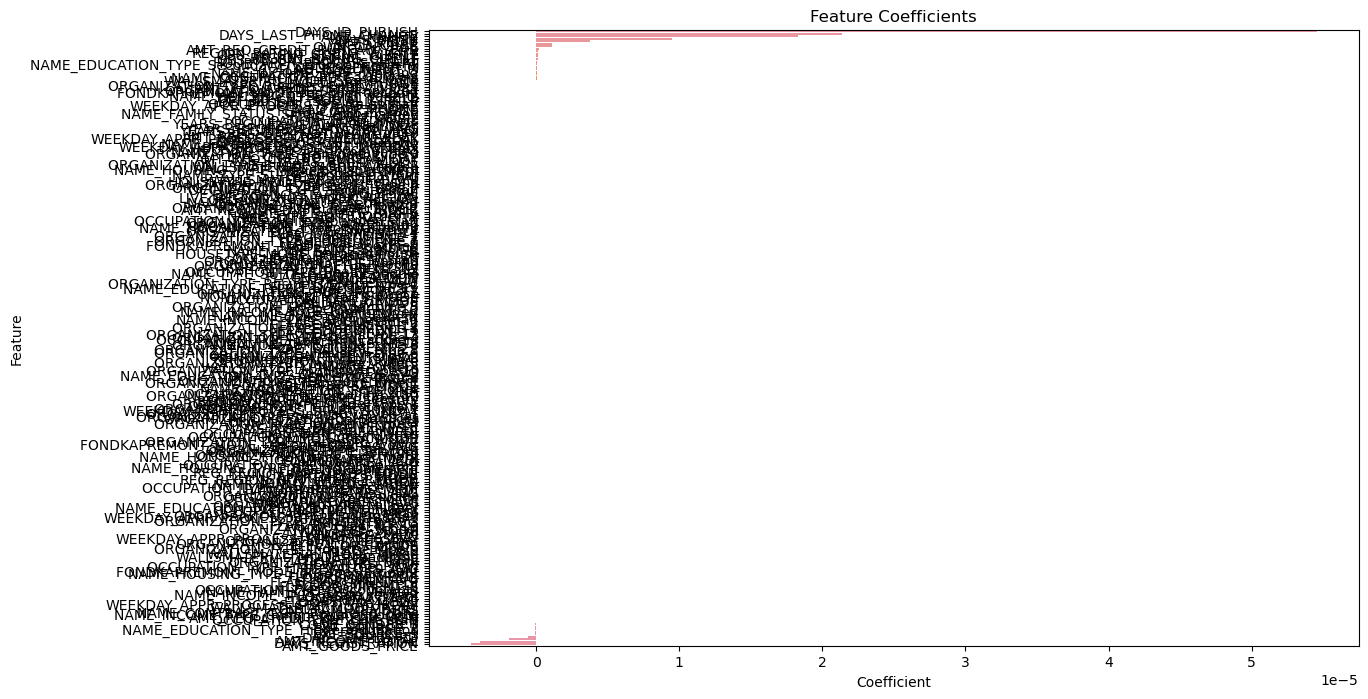

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_coefficients' is a list or array of feature coefficients
# Replace it with the actual variable you have
feature_coefficients = log_reg.coef_[0]

# Assuming 'feature_names' is a list of your feature names
# Replace it with the actual variable you have
feature_names = x_train.columns.tolist()

# Create a DataFrame for feature coefficients
feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})

# Sort the DataFrame by coefficient values for better visualization
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plotting feature coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients_df)
plt.title('Feature Coefficients')
plt.show()

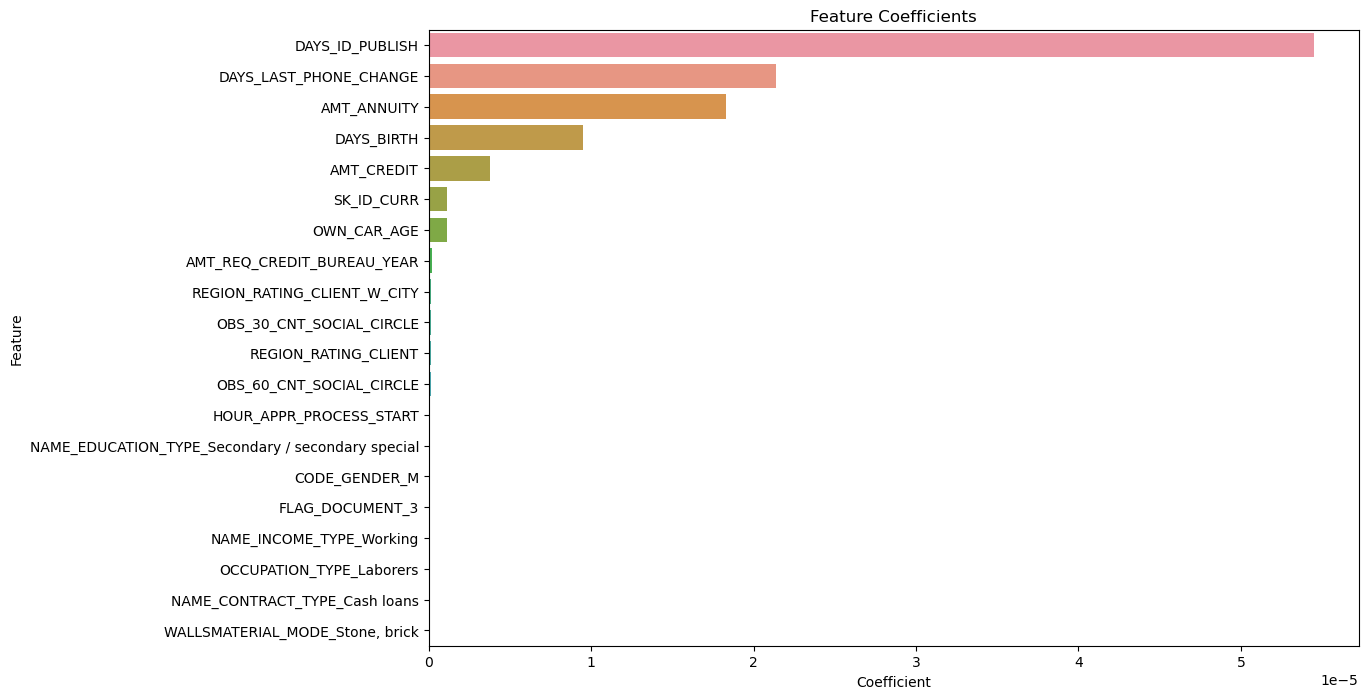

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_coefficients' is a list or array of feature coefficients
# Replace it with the actual variable you have
feature_coefficients = log_reg.coef_[0]

# Assuming 'feature_names' is a list of your feature names
# Replace it with the actual variable you have
feature_names = x_train.columns.tolist()

# Create a DataFrame for feature coefficients
feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})

# Sort the DataFrame by coefficient values for better visualization
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', ascending=False)

top_20_features_df = feature_coefficients_df.head(20)

# Plotting feature coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_20_features_df)
plt.title('Feature Coefficients')
plt.show()

In [101]:
application_test.shape

(48744, 242)

In [102]:
application_train.shape

(307511, 243)

In [ ]:
# Load the CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Identify categorical columns
categorical_columns_train = application_train.select_dtypes('object').columns
categorical_columns_test = application_test.select_dtypes('object').columns

# Apply one-hot encoding to the training set
application_train = pd.get_dummies(application_train, columns=categorical_columns_train)

# Apply one-hot encoding to the test set
application_test = pd.get_dummies(application_test, columns=categorical_columns_test)

# Display the first few rows of the updated datasets
print(application_train.head())
print(application_test.head())